In [1]:
import pandas as pd
import numpy as np
import gc
import re
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s : %(message)s', level=logging.INFO)

%matplotlib inline

In [ ]:
corpus = np.load('session_based_corpus_trainset.npy')

In [4]:
corpus = np.load('session_based_user_corpus_trainset.npy')

In [2]:
corpus = np.load('corpus_dealonly.npy')

In [ ]:
model = Word2Vec(iter=1,compute_loss = True, min_count = 1, size = 200, window = 5, workers = 10, sg = 1, hs = 0, negative = 10)
model.build_vocab(corpus)
#model.train(corpus, total_examples=model.corpus_count, epochs=model.iter)
model.get_latest_training_loss()
alpha = 0.025
alpha_delta = 0.001
passes = 62

loss_val_list = []
for epoch in range(passes):
    model.alpha, model.min_alpha = alpha, alpha
    model.train(corpus, total_examples=model.corpus_count, epochs=model.iter, compute_loss = True)
    alpha -= alpha_delta
    loss_val_list.append(model.get_latest_training_loss())
    print('------------------------------------')
    print('The loss of '+ str(epoch) + ' epoch is '+ str(model.get_latest_training_loss()))
    print('------------------------------------')

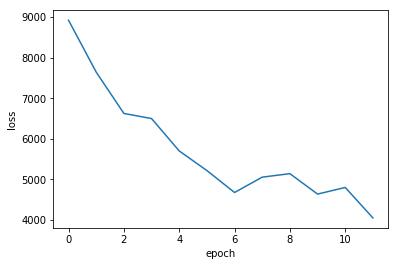

In [26]:
plt.plot(loss_val_list[50:])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [27]:
min(loss_val_list)

4053.016357421875

In [28]:
model.save('/tmp/session_based_user_word2vec_model')

2019-03-15 16:54:17,181:INFO : saving Word2Vec object under /tmp/session_based_user_word2vec_model, separately None
2019-03-15 16:54:17,182:INFO : storing np array 'vectors' to /tmp/session_based_user_word2vec_model.wv.vectors.npy
2019-03-15 16:54:17,403:INFO : not storing attribute vectors_norm
2019-03-15 16:54:17,403:INFO : storing np array 'syn1neg' to /tmp/session_based_user_word2vec_model.trainables.syn1neg.npy
2019-03-15 16:54:18,271:INFO : not storing attribute cum_table
2019-03-15 16:54:19,015:INFO : saved /tmp/session_based_user_word2vec_model


In [ ]:
model = Word2Vec.load('/tmp/word2vec_model')